### ScatterPlot

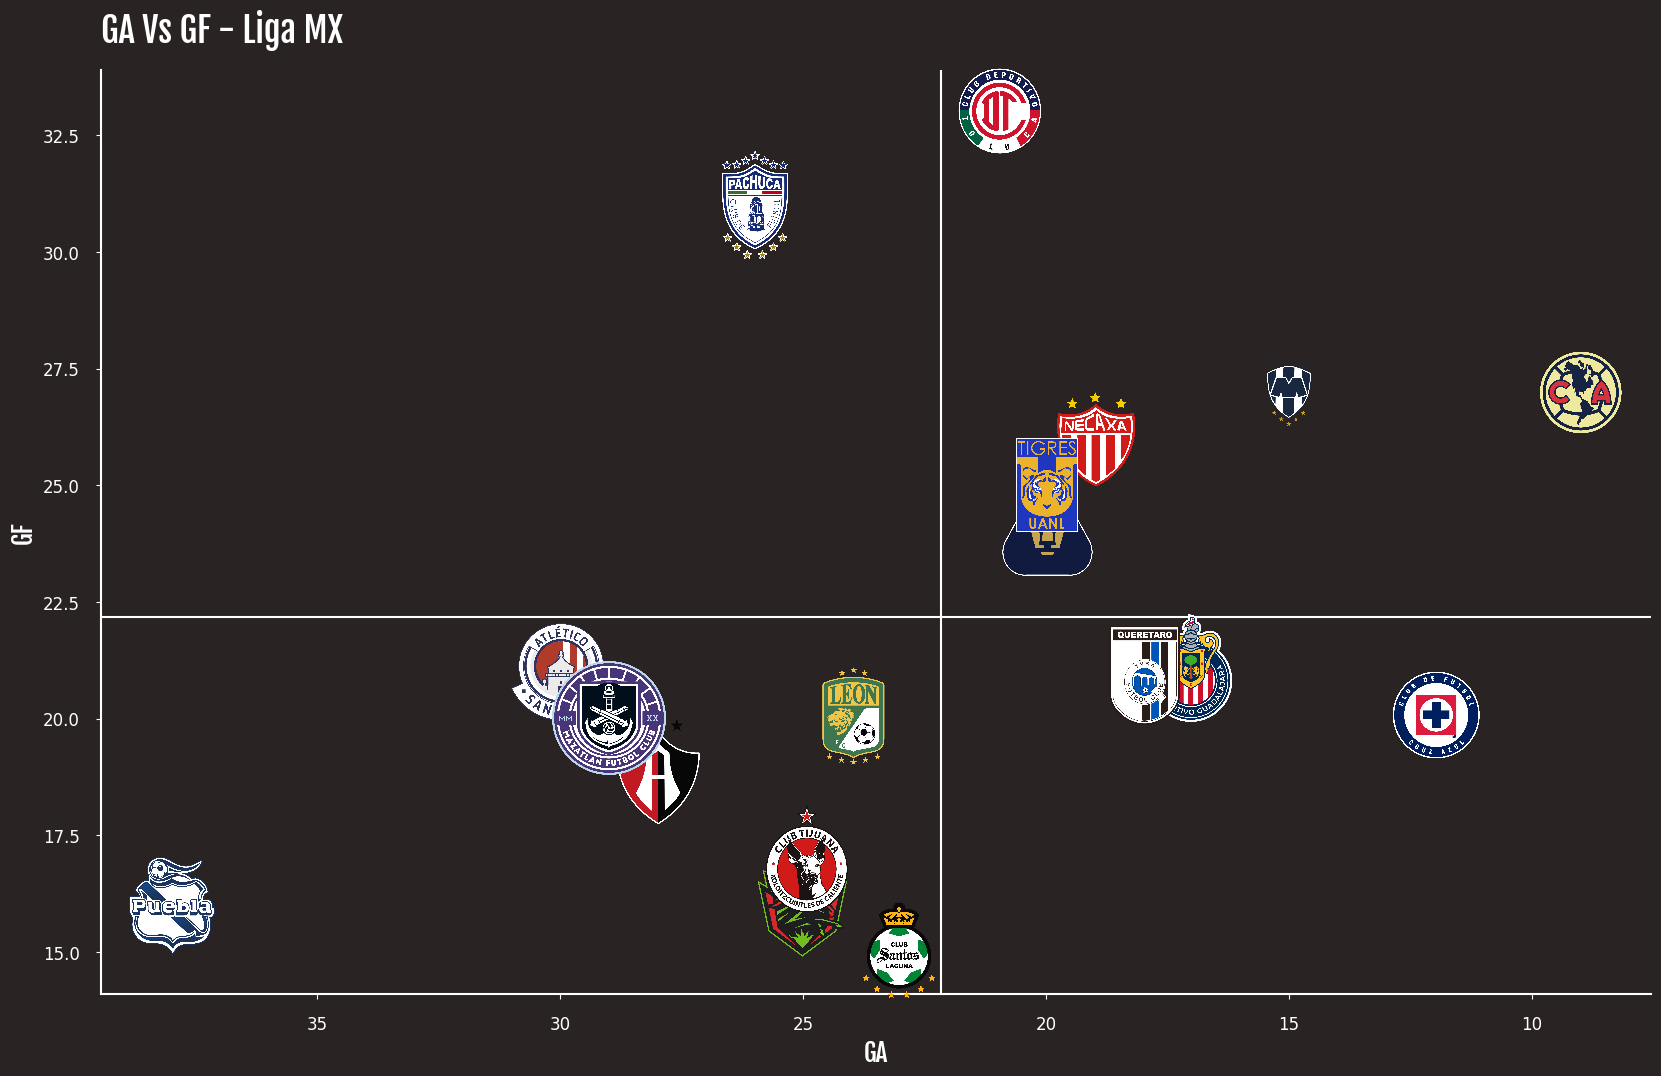

In [4]:
from utils import *
import pandas as pd
# xvars = ['xG','xGA', 'GF','GA']

df = pd.read_csv("data/csvdata/scores_and_fixtures.csv").iloc[:,1:]
season_stages = ['Clausura']
temporada = '2023-2024'
columns = ['MetaEquipo',
                   'xG','xGA', 'GF','GA'
                   ]
data = df[(df.Temporada == temporada) & (df.SeasonStage.isin(season_stages))].dropna(subset={'Result'})[columns]
data = data.groupby('MetaEquipo').sum().reset_index()
make_scatter_team_plot(data, 
    xcolumn='GA',
    ycolumn= 'GF', 
    title="", 
    xlabel='GA', ylabel='GF', zoom=0.063)


##Plot chido

In [3]:
import pandas as pd
df = pd.read_csv('data/csvdata/scores_and_fixtures.csv').iloc[:,1:]
df.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,current_ranking_score_home,current_ranking_score_away,current_goals_difference,current_goals_difference_home,current_goals_difference_away,ranking,partidos_jugados,partidos_jugados_home,partidos_jugados_away,opponent_ranking
0,2015-07-26,17:00,Liga MX,Apertura 2015 Regular Season,Sun,Away,L,2.0,4.0,Puebla,...,NaN,NaN,-2.0,0.0,-2.0,9.0,1.0,0.0,1.0,2.0
1,2015-08-01,17:00,Liga MX,Apertura 2015 Regular Season,Sat,Home,L,1.0,3.0,Atlas,...,NaN,NaN,-4.0,-2.0,-2.0,14.0,2.0,1.0,1.0,7.0
2,2015-08-08,20:05,Liga MX,Apertura 2015 Regular Season,Sat,Away,W,3.0,0.0,Pachuca,...,NaN,NaN,-1.0,-2.0,1.0,9.0,3.0,1.0,2.0,6.0
3,2015-08-11,20:30,Liga MX,Apertura 2015 Regular Season,Tue,Home,W,4.0,0.0,Sinaloa,...,NaN,NaN,3.0,2.0,1.0,5.0,4.0,2.0,2.0,NaN
4,2015-08-14,21:30,Liga MX,Apertura 2015 Regular Season,Fri,Away,W,2.0,0.0,Santos,...,NaN,NaN,5.0,2.0,3.0,5.0,5.0,2.0,3.0,14.0


### Regular Season

Venue: Home and Away

In [50]:
columns = ['Temporada','SeasonStage', 'Season Type', 'Jornada','MetaEquipo', 'Opponent','Venue', 'Result', 'GF', 'GA','xG', 'xGA',  'GoalsDifference',  'TotalGoals',
               'GF_>0 & GA_>0','current_points']
season_stages = ['Apertura']
data = df[columns].copy()
data['Total games'] = 1
data['win_rate'] = data.apply(lambda row: 1 if row['Result'] == 'W' else 0, axis=1)
data['loss_rate'] = data.apply(lambda row: 1 if row['Result'] == 'L' else 0, axis=1)
data['draw_rate'] = data.apply(lambda row: 1 if row['Result'] == 'D' else 0, axis=1)
data = data[data.SeasonStage.isin(season_stages)].dropna(subset={'Jornada'})
grouping_columns = ['SeasonStage', 'Jornada', 'MetaEquipo']
data = data.groupby(by=grouping_columns).agg(
        {'GF':'mean', 'GA':'mean','xG':'mean', 'xGA':'mean',  'GoalsDifference':'mean',  'TotalGoals':'mean',
        'GF_>0 & GA_>0':'mean','win_rate':'mean', 'loss_rate':'mean', 'draw_rate':'mean', 'Total games':'sum'}).reset_index()
data.head()

,SeasonStage,Jornada,MetaEquipo,GF,GA,xG,xGA,GoalsDifference,TotalGoals,GF_>0 & GA_>0,win_rate,loss_rate,draw_rate,Total games
0,Apertura,1.0,America,1.250,1.375,0.900,0.6125,-0.125,2.625,0.500,0.250,0.500,0.25,8
1,Apertura,1.0,Atlas,0.875,0.375,1.025,0.4625,0.500,1.250,0.125,0.375,0.125,0.50,8
2,Apertura,1.0,Atletico,1.000,1.500,1.650,2.0750,-0.500,2.500,0.750,0.250,0.500,0.25,4
3,Apertura,1.0,Cruz_Azul,1.000,1.125,0.975,0.9000,-0.125,2.125,0.125,0.375,0.375,0.25,8
4,Apertura,1.0,FC_Juarez,0.750,1.250,0.750,1.5750,-0.500,2.000,0.500,0.250,0.500,0.25,4


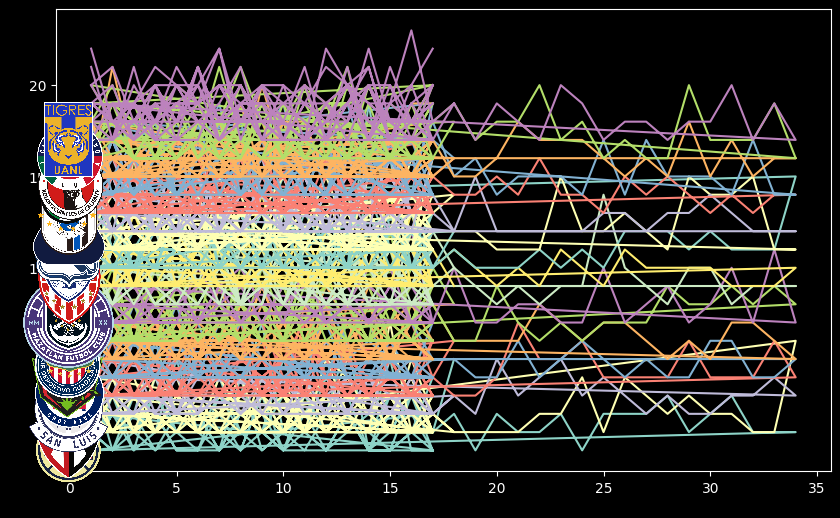

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Set dark brown background
plt.style.use('dark_background')
# Group by MetaEquipo and plot GF against Jornada for each MetaEquipo
fig, ax = plt.subplots(figsize=(10, 6))
# team = row['MetaEquipo']
# img_team_name = image_name_mapping[team]
# f'images/ligamx/{img_team_name}.png'
# Loop through MetaEquipos
for i, metaequipo in enumerate(image_name_mapping.keys()):
    # Filter data for the current MetaEquipo
    metaequipo_data = df[df['MetaEquipo'] == metaequipo]
    # Plot GF against Jornada for the current MetaEquipo, offsetting the y-axis for each
    ax.plot(metaequipo_data['Jornada'], metaequipo_data['GF'], label=metaequipo)
    # Add MetaEquipo's image to the y-axis
    img_team_name = image_name_mapping[metaequipo]

    img = plt.imread(f'images/ligamx/{img_team_name}.png'
)
    imagebox = OffsetImage(img, zoom=0.05)
    ab = AnnotationBbox(imagebox, (-0.1, i), frameon=False)
    ax.add_artist(ab)


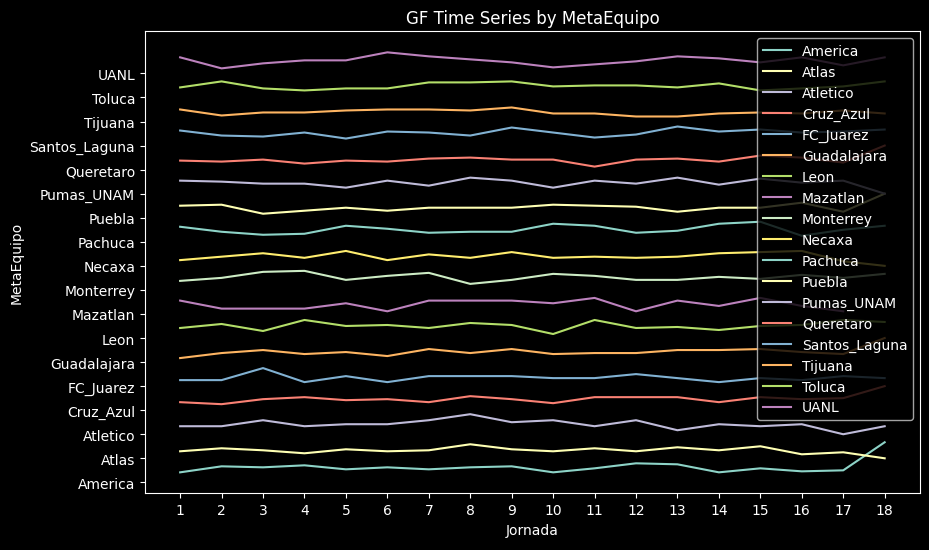

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.ticker import MultipleLocator

# Set dark brown background
plt.style.use('dark_background')
metaequipo_images = image_name_mapping

# Spread out MetaEquipos along the y-axis
num_metaequipos = len(metaequipo_images)
vertical_spacing = 3  # adjust this value to increase/decrease spacing

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through MetaEquipos
for i, (metaequipo, img_team_name) in enumerate(metaequipo_images.items()):
    # Filter data for the current MetaEquipo
    image_path = f'images/ligamx/{img_team_name}.png'
    metaequipo_data = data[data['MetaEquipo'] == metaequipo]
    
    # Plot GF against Jornada for the current MetaEquipo, offsetting the y-axis for each
    ax.plot(metaequipo_data['Jornada'], metaequipo_data['GF'] + i * vertical_spacing, label=metaequipo)
    
    # Add MetaEquipo's image to the y-axis
    img = plt.imread(image_path)
    imagebox = OffsetImage(img, zoom=0.05)
    ab = AnnotationBbox(imagebox, (-1, i * vertical_spacing), frameon=False)
    ax.add_artist(ab)

# Set labels and legend
ax.set_xlabel('Jornada')
ax.set_ylabel('MetaEquipo')
ax.set_yticks([i * vertical_spacing for i in range(num_metaequipos)])
ax.set_yticklabels(metaequipo_images.keys())
ax.set_title('GF Time Series by MetaEquipo')
ax.legend()
# Set x-axis to display only integer values
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.show()

Venue: Home

In [31]:
columns = ['Temporada','SeasonStage', 'Season Type', 'Jornada','MetaEquipo', 'Opponent','Venue', 'Result', 'GF', 'GA','xG', 'xGA',  'GoalsDifference',  'TotalGoals',
               'GF_>0 & GA_>0','current_points']
season_stages = ['Apertura', 'Clausura', 'Guardianes']
venue = ['Home']
data = df[columns].copy()
data['Total games'] = 1
data['win_rate'] = data.apply(lambda row: 1 if row['Result'] == 'W' else 0, axis=1)
data['loss_rate'] = data.apply(lambda row: 1 if row['Result'] == 'L' else 0, axis=1)
data['draw_rate'] = data.apply(lambda row: 1 if row['Result'] == 'D' else 0, axis=1)
data = data[(data.SeasonStage.isin(season_stages)) & (data.Venue.isin(venue))].dropna(subset={'Jornada'})
grouping_columns = ['SeasonStage', 'Jornada', 'MetaEquipo']
data = data.groupby(by=grouping_columns).agg(
        {'GF':'mean', 'GA':'mean','xG':'mean', 'xGA':'mean',  'GoalsDifference':'mean',  'TotalGoals':'mean',
        'GF_>0 & GA_>0':'mean','win_rate':'mean', 'loss_rate':'mean', 'draw_rate':'mean', 'Total games':'sum'}).reset_index()
data

,SeasonStage,Jornada,MetaEquipo,GF,GA,xG,xGA,GoalsDifference,TotalGoals,GF_>0 & GA_>0,win_rate,loss_rate,draw_rate,Total games
0,Apertura,1.0,America,1.400000,1.000000,0.880000,0.620000,0.400000,2.400000,0.400000,0.400000,0.400000,0.200000,5
1,Apertura,1.0,Atlas,0.800000,0.600000,1.200000,0.460000,0.200000,1.400000,0.200000,0.400000,0.200000,0.400000,5
2,Apertura,1.0,Atletico,0.666667,1.666667,1.933333,2.200000,-1.000000,2.333333,0.666667,0.000000,0.666667,0.333333,3
3,Apertura,1.0,Cruz_Azul,1.000000,1.666667,1.466667,0.333333,-0.666667,2.666667,0.000000,0.333333,0.666667,0.000000,3
4,Apertura,1.0,FC_Juarez,1.000000,3.000000,0.400000,2.900000,-2.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,Guardianes,34.0,Leon,2.000000,1.000000,2.500000,0.600000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1
919,Guardianes,34.0,Monterrey,1.000000,0.000000,2.600000,0.300000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1
920,Guardianes,34.0,Necaxa,1.000000,5.000000,0.400000,2.800000,-4.000000,6.000000,1.000000,0.000000,1.000000,0.000000,1
921,Guardianes,34.0,Pumas_UNAM,0.000000,1.000000,2.000000,1.400000,-1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1


Venue: Away

In [9]:
columns = ['Temporada','SeasonStage', 'Season Type', 'Jornada','MetaEquipo', 'Opponent','Venue', 'Result', 'GF', 'GA','xG', 'xGA',  'GoalsDifference',  'TotalGoals',
               'GF_>0 & GA_>0','current_points']
season_stages = ['Apertura', 'Clausura', 'Guardianes']
venue = ['Away']
data = df[columns].copy()
data['Total games'] = 1
data['win_rate'] = data.apply(lambda row: 1 if row['Result'] == 'W' else 0, axis=1)
data['loss_rate'] = data.apply(lambda row: 1 if row['Result'] == 'L' else 0, axis=1)
data['draw_rate'] = data.apply(lambda row: 1 if row['Result'] == 'D' else 0, axis=1)
data = data[(data.SeasonStage.isin(season_stages)) & (data.Venue.isin(venue))].dropna(subset={'Jornada'})
grouping_columns = ['SeasonStage', 'Jornada', 'MetaEquipo']
data = data.groupby(by=grouping_columns).agg(
        {'GF':'mean', 'GA':'mean','xG':'mean', 'xGA':'mean',  'GoalsDifference':'mean',  'TotalGoals':'mean',
        'GF_>0 & GA_>0':'mean','win_rate':'mean', 'loss_rate':'mean', 'draw_rate':'mean', 'Total games':'sum'}).reset_index()
data.head()

,SeasonStage,Jornada,MetaEquipo,GF,GA,xG,xGA,GoalsDifference,TotalGoals,GF_>0 & GA_>0,win_rate,loss_rate,draw_rate,Total games
0,Apertura,1.0,America,1.000000,2.000000,0.933333,0.600000,-1.0,3.000000,0.666667,0.000000,0.666667,0.333333,3
1,Apertura,1.0,Atlas,1.000000,0.000000,0.733333,0.466667,1.0,1.000000,0.000000,0.333333,0.000000,0.666667,3
2,Apertura,1.0,Atletico,2.000000,1.000000,0.800000,1.700000,1.0,3.000000,1.000000,1.000000,0.000000,0.000000,1
3,Apertura,1.0,Cruz_Azul,1.000000,0.800000,0.680000,1.240000,0.2,1.800000,0.200000,0.400000,0.200000,0.400000,5
4,Apertura,1.0,FC_Juarez,0.666667,0.666667,0.866667,1.133333,0.0,1.333333,0.333333,0.333333,0.333333,0.333333,3


### Liguilla

Venue: Home and Away

In [29]:
columns = ['Temporada','SeasonStage', 'Season Type', 'Jornada','MetaEquipo', 'Opponent','Venue', 'Result', 'GF', 'GA','xG', 'xGA',  'GoalsDifference',  'TotalGoals',
               'GF_>0 & GA_>0','current_points']
season_stages = ['Liguilla']
season_types = ['Quarter-finals', 'Semi-finals', 'Finals']
venue = ['Home', 'Away']

data = df[columns].copy()
data['Total games'] = 1
data['win_rate'] = data.apply(lambda row: 1 if row['Result'] == 'W' else 0, axis=1)
data['loss_rate'] = data.apply(lambda row: 1 if row['Result'] == 'L' else 0, axis=1)
data['draw_rate'] = data.apply(lambda row: 1 if row['Result'] == 'D' else 0, axis=1)
data = data[(data.SeasonStage.isin(season_stages))&(data['Season Type'].isin(season_types))&(data['Venue'].isin(venue))]

# grouping_columns = ['SeasonStage', 'Jornada', 'MetaEquipo']
# data = data.groupby(by=grouping_columns).agg(
#         {'GF':'mean', 'GA':'mean','xG':'mean', 'xGA':'mean',  'GoalsDifference':'mean',  'TotalGoals':'mean',
#         'GF_>0 & GA_>0':'mean','win_rate':'mean', 'loss_rate':'mean', 'draw_rate':'mean', 'Total games':'sum'}).reset_index()
data.head()

,Temporada,SeasonStage,Season Type,Jornada,MetaEquipo,Opponent,Venue,Result,GF,GA,xG,xGA,GoalsDifference,TotalGoals,GF_>0 & GA_>0,current_points,Total games,win_rate,loss_rate,draw_rate
5499,2023-2024,Liguilla,Quarter-finals,NaN,America,León,Away,D,2.0,2.0,2.2,1.3,0.0,4.0,1,NaN,1,0,0,1
5500,2023-2024,Liguilla,Quarter-finals,NaN,America,León,Home,W,2.0,0.0,2.3,0.3,2.0,2.0,0,NaN,1,1,0,0
5501,2023-2024,Liguilla,Semi-finals,NaN,America,Atlético,Away,W,5.0,0.0,2.7,1.0,5.0,5.0,0,NaN,1,1,0,0
5502,2023-2024,Liguilla,Semi-finals,NaN,America,Atlético,Home,L,0.0,2.0,0.2,2.0,-2.0,2.0,0,NaN,1,0,1,0
5503,2023-2024,Liguilla,Finals,NaN,America,UANL,Away,D,1.0,1.0,1.7,0.6,0.0,2.0,1,NaN,1,0,0,1


Venue: Home 

In [30]:
columns = ['Temporada','SeasonStage', 'Season Type', 'Jornada','MetaEquipo', 'Opponent','Venue', 'Result', 'GF', 'GA','xG', 'xGA',  'GoalsDifference',  'TotalGoals',
               'GF_>0 & GA_>0','current_points']
season_stages = ['Liguilla']
season_types = ['Quarter-finals', 'Semi-finals', 'Finals']
venue = ['Home']

data = df[columns].copy()
data['Total games'] = 1
data['win_rate'] = data.apply(lambda row: 1 if row['Result'] == 'W' else 0, axis=1)
data['loss_rate'] = data.apply(lambda row: 1 if row['Result'] == 'L' else 0, axis=1)
data['draw_rate'] = data.apply(lambda row: 1 if row['Result'] == 'D' else 0, axis=1)
data = data[(data.SeasonStage.isin(season_stages))&(data['Season Type'].isin(season_types))&(data['Venue'].isin(venue))]

# grouping_columns = ['SeasonStage', 'Jornada', 'MetaEquipo']
# data = data.groupby(by=grouping_columns).agg(
#         {'GF':'mean', 'GA':'mean','xG':'mean', 'xGA':'mean',  'GoalsDifference':'mean',  'TotalGoals':'mean',
#         'GF_>0 & GA_>0':'mean','win_rate':'mean', 'loss_rate':'mean', 'draw_rate':'mean', 'Total games':'sum'}).reset_index()
data.head()

,Temporada,SeasonStage,Season Type,Jornada,MetaEquipo,Opponent,Venue,Result,GF,GA,xG,xGA,GoalsDifference,TotalGoals,GF_>0 & GA_>0,current_points,Total games,win_rate,loss_rate,draw_rate
5500,2023-2024,Liguilla,Quarter-finals,NaN,America,León,Home,W,2.0,0.0,2.3,0.3,2.0,2.0,0,NaN,1,1,0,0
5502,2023-2024,Liguilla,Semi-finals,NaN,America,Atlético,Home,L,0.0,2.0,0.2,2.0,-2.0,2.0,0,NaN,1,0,1,0
5504,2023-2024,Liguilla,Finals,NaN,America,UANL,Home,W,3.0,0.0,2.1,0.7,3.0,3.0,0,NaN,1,1,0,0
5506,2023-2024,Liguilla,Quarter-finals,NaN,Atletico,Monterrey,Home,W,1.0,0.0,1.1,0.6,1.0,1.0,0,NaN,1,1,0,0
5508,2023-2024,Liguilla,Semi-finals,NaN,Atletico,América,Home,L,0.0,5.0,1.0,2.7,-5.0,5.0,0,NaN,1,0,1,0
